<a href="https://colab.research.google.com/github/ngoctran1910/GA/blob/master/indexEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

#Constants
AREA_SIZE = [100, 100]
GRID_SIZE = [10, 10]
TARGET_POSITIONS = 121
POPULATION_SIZE = 100
INDIVIDUAL_SIZE = 100 #number of potential locations
NUMBER_OF_SENSORS = 20
SINK_LOCATION = [50, 50]
GEN_MAX = 250

COMMUNICATION_RANGE = 30
SENSING_RANGE = 15
DESIRED_CONNECTIVITY = 4
DESIRED_COVERAGE = 2

(100, 100)


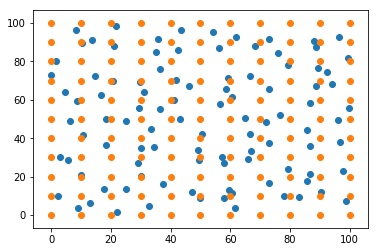

In [37]:
#Initial
def get_dots(width, height, pitch):
  xs = []
  ys = []
#     pos = np.zeros(100, 2)
  for y in range(height // pitch):
    for x in range(width // pitch):
      xs.append((x + random.random()) * pitch)
      ys.append((y + random.random()) * pitch)
  pos = np.array((xs, ys)).T
  return pos

potentialPos = get_dots(100, 100, 10)
xs, ys = potentialPos.T
plt.scatter(xs, ys)
# plt.axis((0., 100., 0., 100.))
plt.show

targetPos = []
i =0 ; j= 0
while i <= AREA_SIZE[0]:
  while j <= AREA_SIZE[1]:
    targetPos.append([i, j])
    j = j + 10
  j = 0
  i = i + 10
targetPos = np.array(targetPos)
#print(targetPos.shape)
x, y = targetPos.T
plt.scatter(x, y)
plt.show

targetToPotential = np.zeros((INDIVIDUAL_SIZE, TARGET_POSITIONS)) #cột i là khoảng cách từ target location i đến các điểm có thể đặt sensors
for i in range(potentialPos.shape[0]):
  for j in range(targetPos.shape[0]):
    temp = np.linalg.norm(potentialPos[i]-targetPos[j])
    targetToPotential[i][j] = temp if temp != 0 else 0.001 
# print(targetToPotential.shape)

potentialToPotential = np.zeros((INDIVIDUAL_SIZE, INDIVIDUAL_SIZE))
for i in range(INDIVIDUAL_SIZE):
  for j in range(INDIVIDUAL_SIZE):
    potentialToPotential[i][j] = np.linalg.norm(potentialPos[i]-potentialPos[j])
print(potentialToPotential.shape)

In [0]:
def createIndividual():
  individual = [0] * INDIVIDUAL_SIZE
  index = [] #lưu vị trí sẽ chọn đặt sensor
#   print(len(individual))
  for i in range(NUMBER_OF_SENSORS):
    tmp = random.randint(0, INDIVIDUAL_SIZE - 1)
    while(index.count(tmp) == 1):
      tmp = random.randint(0, INDIVIDUAL_SIZE - 1)
    index.append(tmp)
  return index
# print(createIndividual())

def createPopulation():
  population = np.zeros((POPULATION_SIZE, NUMBER_OF_SENSORS))
  for i in range(POPULATION_SIZE):
    population[i] = np.array((createIndividual()))
  return population
# a = createPopulation()
# print(a)

def computeCoverage(indi):
  cov = np.zeros((NUMBER_OF_SENSORS, TARGET_POSITIONS))
  res = 0
  for i in range(NUMBER_OF_SENSORS):
    cov[i] = targetToPotential[int(indi[i])]
  for j in range(TARGET_POSITIONS):
    y = cov[:, j]
    x = np.count_nonzero(y <= SENSING_RANGE)
    if(x >= DESIRED_COVERAGE):
      res = res + 1
    else:
      res = res + 1.0 * (x/(DESIRED_COVERAGE))
  return round(res/TARGET_POSITIONS, 2)

# print(a[0])
# cov = computeCoverage(a[0])
# print(cov)

def computeConnectivity(indi):
  li = [i for i in list(range(INDIVIDUAL_SIZE)) if i not in indi]
#   con = np.zeros((NUMBER_OF_SENSORS, NUMBER_OF_SENSORS))
  con = np.delete(potentialToPotential, li, 1)
  con = np.delete(con, li, 0)
  res = 0
  for j in range(NUMBER_OF_SENSORS):
    x = np.count_nonzero(con[j] <= COMMUNICATION_RANGE) - 1
    if x >= DESIRED_CONNECTIVITY:
      res = res + 1
    else:
      res = res + 1.0 * (x/(DESIRED_CONNECTIVITY))
  return round(res/NUMBER_OF_SENSORS, 2)
# print(computeConnectivity(a[0]))

In [0]:
def crossover(indi1, indi2):
  crossoverPoint = random.randint(0, NUMBER_OF_SENSORS - 1)
  child = list(indi1[:crossoverPoint])
  index = [j for j in indi2 if j not in child]
  for i in range(NUMBER_OF_SENSORS - crossoverPoint):
    child.append(index[i])
  return np.array((child))
# print(a[0])
# print(a[1])
# child = crossover(a[0], a[1])
# print(child)

In [0]:
def mutate(indi, mutationRate = 0.05):
  candidate = [i for i in list(range(INDIVIDUAL_SIZE)) if i not in indi.astype(int)]
  count = 0
  for i in range(NUMBER_OF_SENSORS):
    if random.random() < mutationRate:
      choice = random.choice(candidate)
      indi[i] = choice
      candidate.remove(choice)
      count = count + 1
  if count == 0:
    index = random.randint(0, NUMBER_OF_SENSORS - 1)
    indi[index] = random.choice(candidate)
  return indi
# print(a[0])
# print(mutate(a[0]))
# mutate(child)
# print(child)

In [41]:
_lambda = np.random.uniform(size = POPULATION_SIZE)
_lambda1 = np.tile(_lambda, POPULATION_SIZE).reshape(POPULATION_SIZE, POPULATION_SIZE)
_lambda2 = np.tile(_lambda, POPULATION_SIZE).reshape(POPULATION_SIZE, POPULATION_SIZE).T
print(_lambda)
res = abs(_lambda1 - _lambda2)
res = np.argsort(res)
neighbor = res[:, 0:5]
# print(res[0])
# print(res[1])
print(neighbor)  

[0.59298952 0.05412374 0.07607079 0.75403766 0.05990846 0.45009586
 0.31237186 0.21356185 0.9140614  0.35410813 0.59026379 0.23905774
 0.3772977  0.60102168 0.1779635  0.21305485 0.51721746 0.83065358
 0.65488634 0.24807742 0.22876305 0.76440743 0.79448103 0.61960926
 0.4645122  0.75334217 0.36115526 0.68652804 0.90015447 0.53781648
 0.85208152 0.26846706 0.74954352 0.81169286 0.72571718 0.84875308
 0.0565157  0.38951441 0.00479876 0.463917   0.9375199  0.53881259
 0.55196535 0.19183391 0.78163398 0.32463955 0.70932486 0.70479898
 0.39083832 0.5576284  0.75901585 0.04948896 0.81641713 0.41120485
 0.84132393 0.40814259 0.19977818 0.76325599 0.1319139  0.91358746
 0.76305733 0.75964398 0.64124224 0.43170302 0.94221326 0.80185731
 0.34218348 0.89201084 0.81690399 0.82696836 0.08204969 0.97172592
 0.33095815 0.10081012 0.43633554 0.70515133 0.34799228 0.62227343
 0.48696216 0.43257207 0.78070693 0.90736728 0.43252203 0.23664622
 0.94718361 0.75362928 0.48784492 0.20309729 0.23147925 0.0956

In [0]:
def checkNonDominated(fv1, fv2): #check if fv2 dominated fv1
  if np.count_nonzero(fv1 <= fv2) == 2:
    if np.count_nonzero(fv1 < fv2) >= 1:
      return True
  return False
def computeFitness(indiFV, indiLambda):
  return round(np.sum(indiFV * [indiLambda, 1 - indiLambda]), 2)
# print(computeFitness(a[0], _lambda[0]))
# print(_lambda[0])
# print(_lambda[int(neighbor[35][1])])
# print(_lambda[75])

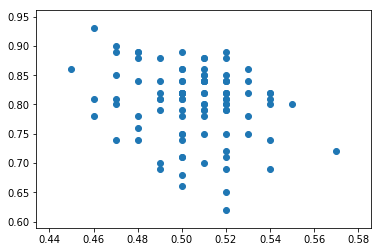

In [62]:
#main
a = createPopulation()
EP = []
FV = np.zeros((POPULATION_SIZE, 2))
for i in range(POPULATION_SIZE):
  FV[i] = [computeCoverage(a[i]), computeConnectivity(a[i])]
x, y = FV.T
plt.scatter(x, y)
plt.show


for gen in range(250):
  for i in range(POPULATION_SIZE):
    #Step 1
    k, l = random.sample(list(neighbor[i]), 2)
    child = crossover(a[k], a[l])
    mutate(child)
    childFV = np.array(([computeCoverage(child), computeConnectivity(child)]))
    
    #Step 2
    for neighborIndex in neighbor[i]:
      childFitness = computeFitness(childFV, _lambda[neighborIndex])
      neighborFitness = computeFitness(FV[neighborIndex], _lambda[neighborIndex])
      if childFitness > neighborFitness:
        a[neighborIndex] = child
        FV[neighborIndex] = childFV
        
    #Step 3: remove from EP all indi dominated by child
    count = 0
    index = []
    for j in range(len(EP)):
      tmp = [computeCoverage(EP[j]), computeConnectivity(EP[j])]
      if checkNonDominated(tmp, childFV) == True:
        index.append(list(EP[j]))
      if checkNonDominated(childFV, tmp) == True:
        count = count + 1
    EP = [ele for ele in EP if ele not in index]
    if count == 0:
      EP.append(list(child))

14
[[ 56. 100.]
 [ 56. 100.]
 [ 56. 100.]
 [ 60.  95.]
 [ 59.  96.]
 [ 56. 100.]
 [ 62.  82.]
 [ 59.  96.]
 [ 59.  96.]
 [ 57.  99.]
 [ 59.  96.]
 [ 57.  99.]
 [ 61.  88.]
 [ 57.  99.]]


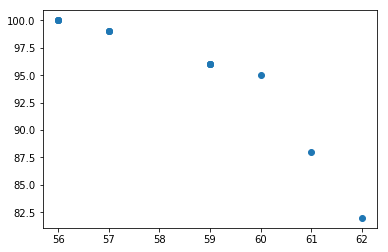

In [65]:
print(len(EP))
FV1 = np.zeros((len(EP), 2))
for i in range(len(EP)):
  FV1[i] = computeCoverage(EP[i])*100, computeConnectivity(EP[i])*100
x, y = FV1.T
plt.scatter(x, y)
plt.show
print(FV1)

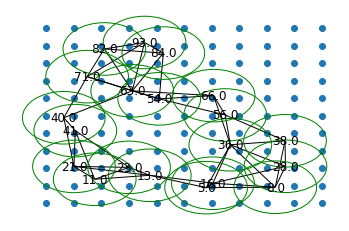

In [104]:
potentialToSink = np.zeros((INDIVIDUAL_SIZE))
for i in range(INDIVIDUAL_SIZE):
  potentialToSink[i] = np.linalg.norm(potentialPos[i] - np.array((SINK_LOCATION)))
# print(potentialToSink)

def getEdges(indi):
  edges = []
  for i in indi:
    x = int(i)
    for j in indi:
      y = int(j)
      if potentialToPotential[x][y] > 0 and potentialToPotential[x][y] <= COMMUNICATION_RANGE:
        edges.append([x, y])
  return edges
posdict = {}
for i in EP[0]:
  posdict[int(i)] = tuple((potentialPos[int(i)]))
# print(posdict[26])
  
fig, ax = plt.subplots()
G = nx.Graph()
G.add_nodes_from(list(EP[0]))
G.add_edges_from(getEdges(EP[0]))
x, y = targetPos.T
plt.scatter(x, y)
for i in EP[0]:
  ax.add_patch(plt.Circle((posdict[i][0], posdict[i][1]), radius=15, color='g', fill=False))
plt.show
nx.draw(G, posdict, with_labels=True, node_size=0)

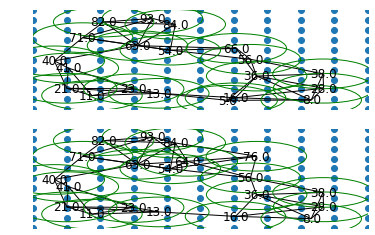

In [103]:
fig, ax = plt.subplots(2, 1, sharex=True)
count = 0
for row in ax:
#   for col in row:
  row.set_xlim([0, 100])
  row.set_ylim([0, 100])
  G = nx.Graph()
  G.add_nodes_from(list(EP[count]))
  G.add_edges_from(getEdges(EP[count]))
  x, y = targetPos.T
  row.scatter(x, y)
  for i in EP[count]:
    posdict[int(i)] = tuple((potentialPos[int(i)]))
  for i in EP[count]:
    row.add_patch(plt.Circle((posdict[i][0], posdict[i][1]), radius=15, color='g', fill=False))
#       plt.show
  nx.draw(G, posdict, with_labels=True, node_size=0, ax = row)
  count = count + 1
plt.show()

In [0]:
x = np.array([1, 5, 3, 9, 3, 8])
print(x.shape)
t = 2
y = [item for i, item in enumerate(x) if i != 3]
print(y)
rep = 5
z = np.tile(x, rep).reshape(rep, x.shape[0]).T
print(z)

(6,)
[1, 5, 3, 3, 8]
[[1 1 1 1 1]
 [5 5 5 5 5]
 [3 3 3 3 3]
 [9 9 9 9 9]
 [3 3 3 3 3]
 [8 8 8 8 8]]


In [0]:
x = np.array(([[1, 2, 3], [0, -1, 19]]))
print(x)
print(np.argsort(x, axis = 1))
print(x[:, 0:2])

[[ 1  2  3]
 [ 0 -1 19]]
[[0 1 2]
 [1 0 2]]
[[ 1  2]
 [ 0 -1]]


2
[[3, 4]]
2 [87. 13. 77. 52. 51. 14. 53. 12. 21. 67. 57. 33.  4. 86. 73. 65. 16.  3.
 55. 41.]
97 [87. 13. 77. 52. 51. 14. 53. 12. 21. 67. 57. 33.  4. 86. 73. 65. 16.  3.
 55. 41.]
70 [87. 13. 77. 52. 51. 14. 53. 12. 21. 67. 57. 33.  4. 86. 73. 65. 16.  3.
 55. 41.]
96 [87. 13. 77. 52. 51. 14. 53. 12. 11. 67. 57. 69.  4. 86. 73. 65. 16. 20.
 55. 41.]
4 [87. 13. 77. 52. 51. 14. 53. 12. 11. 67. 57.  5.  4. 86. 73. 65. 16. 20.
 55. 41.]
[87. 13. 77. 52. 51. 14. 53. 12. 21. 67. 57. 33.  4. 86. 73. 65. 16.  3.
 55. 41.]
[0.49 0.88]
0.5929895198002714
0.6487340872778942
0.65


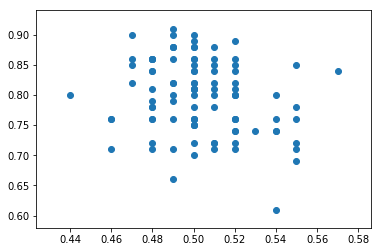

In [56]:
fv = [[1, 2], [3, 4]]
fvtmp = 0, 1
fv[0] = fvtmp
print(len(fv))
EP = []
EP.append(fv[1])
print(EP)

for i in neighbor[2]:
  print(i, a[i])
print(a[2])

n = createPopulation()
candidate = [i for i in list(range(INDIVIDUAL_SIZE)) if i not in n[0]]
FV = np.zeros((POPULATION_SIZE, 2))
for i in range(POPULATION_SIZE):
  FV[i] = [computeCoverage(n[i]), computeConnectivity(n[i])]
x, y = FV.T
plt.scatter(x, y)
plt.show

result = np.sum(FV[1] * [_lambda[0], 1 - _lambda[0]])
print(FV[1])
print(_lambda[0])
print(result)
print(computeFitness(FV[1], _lambda[0]))